Import de todas las librerias necesarias.

Nummpy: Operaciones numéricas eficientes y generación de datos aleatorios

Pandas: Manipulación estructurada de datos

Faker: Generación de datos realistas

Matplotlib: Visualización gráfica de datos

In [81]:
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

Inicializamos el generador de datos "Faker" para generar datos realistas como los nombres. Mediante "es_ES" generamos datos en castellano, por defecto los crearía en inglés.

In [82]:
fake = Faker('es_ES')

Configuramos las probabilidades para crear las notas. Suponemos que sacar entre 5 y 7 es lo más habitual, por eso lo establecemos a 0.5 y el otro 0.5 de probabilidad para el resto de notas.


In [83]:
prob_5_7 = 0.5  
prob_resto = 1 - prob_5_7 

Generamos las 1000 notas gracias a la librería numpy y su función random. Estas se encontrarán entre 1 y 10.

In [84]:
notas = np.where(
    np.random.rand(1000) < prob_5_7,  
    np.clip(np.random.normal(loc=6, scale=1, size=1000), 5, 7),  
    np.random.randint(1, 11, size=1000) 
)

Configuramos las probabilidades para sacar el numero de horas que se estudia diariamente. Suponemos que estudiar entre 3 y 5 es lo más habitual, por eso lo establecemos a 0.5 y el otro 0.5 de probabilidad para el resto de notas.


In [85]:
prob_3_5 = 0.5  
prob_resto = 1 - prob_3_5 

In [86]:
u_horas = np.random.rand(1000)
horas_estudio = np.where(
    u_horas < prob_3_5,
    np.clip(np.random.normal(loc=4, scale=2, size=1000), 0, 8),
    np.random.randint(0, 9, size=1000)
).astype(int)


Creamos un diccionario de datos estructurado que luego se convertirá en un DataFrame de pandas.
Generamos una lista de 1000 nombres completos aleatorios en español usando Faker, asignamos aleatoriamente una de las 3 asignaturas a cada estudiante y finalmente Asignamos las notas generadas previamente (array NumPy) y las convertimos a enteros.



In [87]:
data = {
    'DNI': np.random.randint(1000, 9999, size=1000),
    'Nombre': [f"{fake.first_name()} {fake.last_name()}" for _ in range(1000)],
    'Asignatura': np.random.choice(['Matematicas', 'Fisica', 'Programacion'], 1000),
    'Nota': notas.astype(int),  # Convertir a enteros
    'horas_estudio': horas_estudio.astype(int)
}

Convertimos el diccionario data en una tabla estructurada (DataFrame) de pandas con columnas "Nombre", "Asignatura" y "Nota" y lo guardamos en csv (alumnos_deusto).

Añadimos encoding='utf-8-sig' para que solamente se utilicen los caracteres estandar, ya que sin ello, Faker genera nombres con tildes, por lo que en el csv aparecen mal.

Ejemplo: En vez de Menéndez, aparece MenÃ©ndez

In [88]:
df = pd.DataFrame(data)
df.to_csv('alumnos_deusto.csv', index=False, encoding='utf-8-sig')

Creamos un histograma con las notas del DataFrame, dividiéndolas en 10 intervalos (bins) y añadiendo bordes negros (edgecolor).
Le añadimos título al gráfico ("Distribución de Notas") y etiquetas a los ejes (X: "Nota", Y: "Frecuencia") ty mostramos el histograma.

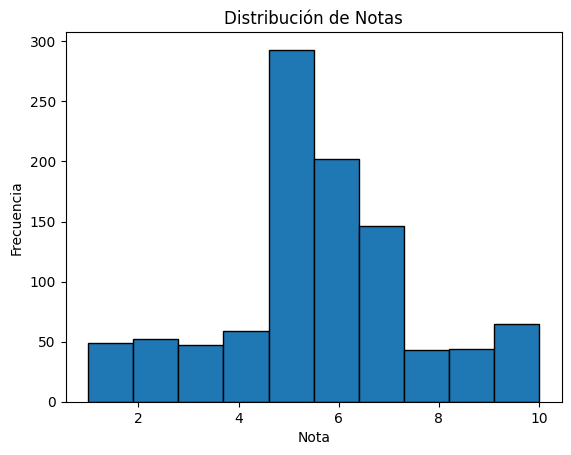

In [89]:
plt.hist(df['Nota'], bins=10, edgecolor='black')
plt.title('Distribución de Notas')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

Como podemos ver, la mayoría de notas, efectivamente se sitúan entre el 5 y el 7, creando una distribución normal.

Cargamos el csv original para dividirlo en 2 archivos (alumnos  notas)

In [90]:
df = pd.read_csv('alumnos_deusto.csv', encoding='utf-8-sig')

Archivo de alumnos (sin notas)

In [91]:
df[['Nombre']].to_csv('alumnos.csv', index=False)


Archivo de notas (asignatura + nota)

In [92]:
df[['Asignatura', 'Nota']].to_csv('notas.csv', index=False)


## Limpieza

Duplicados: verificamos que no haya. En caso de haber borramos la segunda aparición y lo guardamos en otro csv.

In [93]:
duplicados = df[df["DNI"].duplicated()]

In [94]:
if not duplicados.empty:
    print("Hay DNIs duplicados:")
    print(duplicados)
else:
    print("No hay DNIs duplicados.")

Hay DNIs duplicados:
      DNI            Nombre    Asignatura  Nota  horas_estudio
57   8841      Loida Olmedo  Programacion    10              4
130  7024    Clementina Bru  Programacion     5              3
232  6427  José Luis Casado   Matematicas     9              8
258  5075     Andrés Dávila  Programacion     6              7
349  3895     Nazaret Bosch        Fisica     8              5
..    ...               ...           ...   ...            ...
976  1414   Elpidio Arrieta        Fisica    10              3
979  5971    Sigfrido Otero   Matematicas     5              4
980  5985        Lucas Daza  Programacion     5              8
989  7628  Modesto Hernando        Fisica     1              5
996  6687       Loida Boada   Matematicas     9              8

[69 rows x 5 columns]


In [95]:
df_sin_duplicados = df.drop_duplicates(subset='DNI', keep='first')
df_sin_duplicados.to_csv("alumnos_deusto_sin_duplicados.csv", index=False)


In [96]:
df = pd.read_csv('alumnos_deusto_sin_duplicados.csv', encoding='utf-8-sig')

print("Valores nulos por columna:")
print(df.isnull().sum(), "\n")

df_sin_nulos = df.dropna()
print("Tamaño tras dropna:", df_sin_nulos.shape)

df_sin_nulos.to_csv("alumnos_deusto_sin_nulos.csv", index=False)

Valores nulos por columna:
DNI              0
Nombre           0
Asignatura       0
Nota             0
horas_estudio    0
dtype: int64 

Tamaño tras dropna: (931, 5)


In [ ]:
df = pd.read_csv('alumnos_deusto_sin_nulos.csv', encoding='utf-8-sig')
df = df[["Nota", "horas_estudio"]]

# Estadísticas descriptivas completas
#No saca nada
df.describe()

# Mediana de las numéricas
#no saca nada
df.median(numeric_only=True)

# Mínimos y máximos
print("Mínimos:\n", df.min(numeric_only=True))
print("Máximos:\n", df.max(numeric_only=True))

# Medias y desviaciones estándar
print("Medias:\n", df.mean(numeric_only=True))
print("Desviaciones estándar:\n", df.std(numeric_only=True))

# Varianza y rango
print("Varianzas:\n", df.var(numeric_only=True))
print("Rangos (max-min):\n", df.max(numeric_only=True) - df.min(numeric_only=True))

resumen descrive:
mediana:
Mínimos:
 Nota             1
horas_estudio    0
dtype: int64
Máximos:
 Nota             10
horas_estudio     8
dtype: int64
Medias:
 Nota             5.643394
horas_estudio    3.687433
dtype: float64
Desviaciones estándar:
 Nota             2.132091
horas_estudio    2.294463
dtype: float64
Varianzas:
 Nota             4.545814
horas_estudio    5.264562
dtype: float64
Rangos (max-min):
 Nota             9
horas_estudio    8
dtype: int64


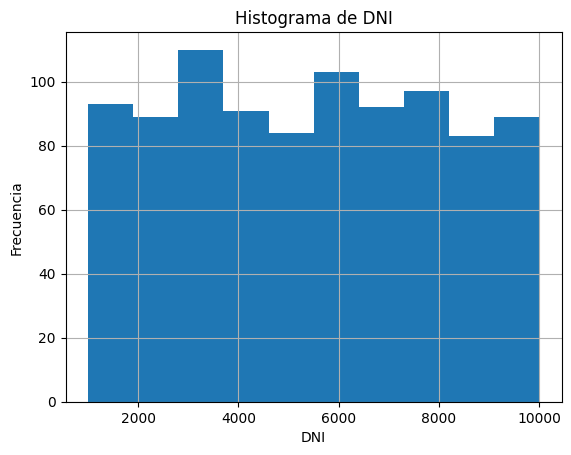

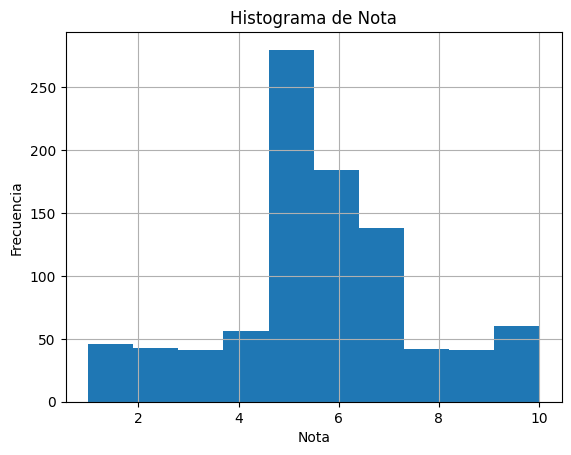

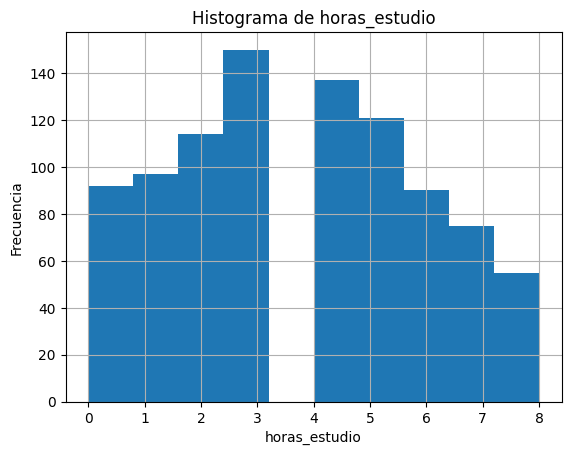

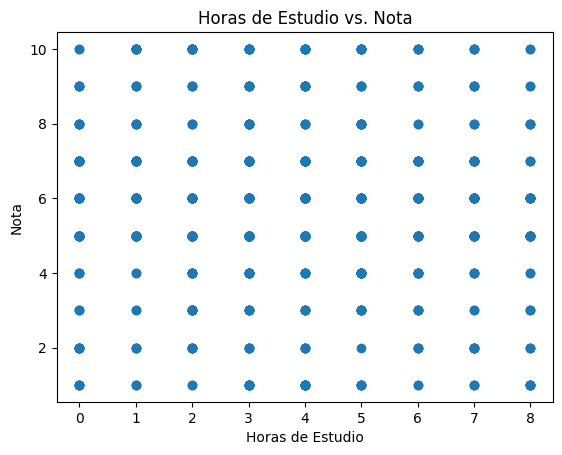

<Figure size 800x500 with 0 Axes>

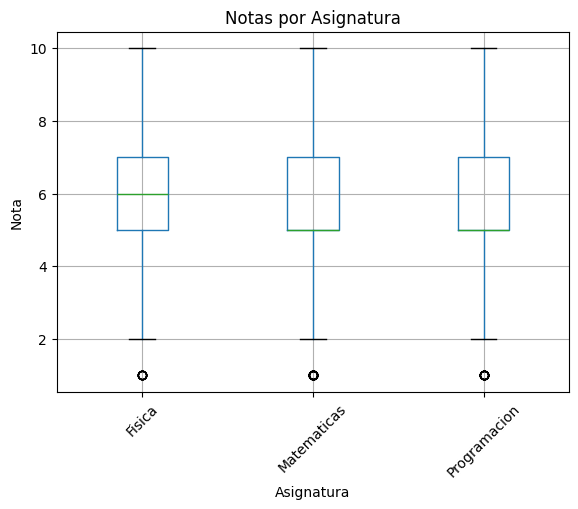

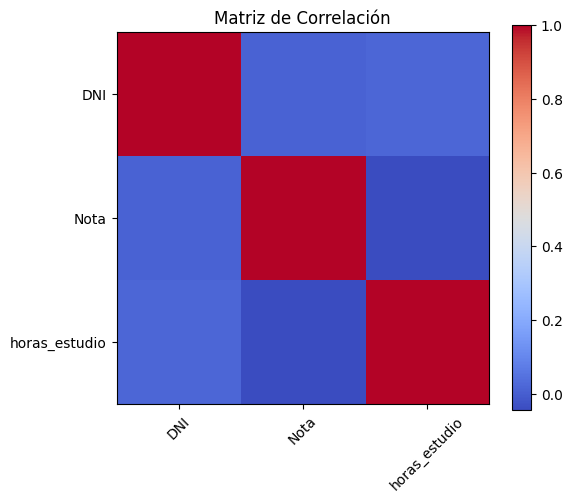

In [100]:
import matplotlib.pyplot as plt

# A) Histogramas de todas las variables numéricas
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure()
    df[col].hist(bins=10)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# B) Scatter: ejemplo horas_estudio vs nota (ajusta nombres)
plt.figure()
plt.scatter(df['horas_estudio'], df['Nota'])
plt.title('Horas de Estudio vs. Nota')
plt.xlabel('Horas de Estudio')
plt.ylabel('Nota')
plt.show()

# C) Boxplot de notas por asignatura
plt.figure(figsize=(8,5))
df.boxplot(column='Nota', by='Asignatura', rot=45)
plt.title('Notas por Asignatura')
plt.suptitle('')
plt.xlabel('Asignatura')
plt.ylabel('Nota')
plt.show()

# D) Matriz de correlación y heatmap
import numpy as np
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Matriz de Correlación')
plt.show()
